In [1]:
#import required packages
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas_gbq
import plotly.graph_objs as go
import plotly as ply
import chart_studio.plotly as py
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output
from datetime import datetime as dt, timedelta

In [2]:
def service_options():
    service_sql = """SELECT DISTINCT SERVICE_TYPE value FROM
    `bcx-insights.telkom_customerexperience.customerdata_20190902_00_anon`
    WHERE SERVICE_TYPE is not NULL AND CUSTOMER_NO_ANON in
    (SELECT DISTINCT ACCOUNT_NO_ANON FROM
    `bcx-insights.telkom_customerexperience.orders_20190903_00_anon`)"""

    options = pd.io.gbq.read_gbq(service_sql,
                                    project_id='bcx-insights',
                                    dialect='standard').fillna('N/A')

    options['label'] = options['value'].str.title()

    options = [{'label': x['label'],
                'value': x['value']} for _, x in options.iterrows()]

    return options


In [3]:
service_options()

[{'label': 'Fixed', 'value': 'FIXED'}, {'label': 'Mobile', 'value': 'MOBILE'}]

In [4]:
def customer_type():
    type_sql = """SELECT DISTINCT CUSTOMER_TYPE_DESC value FROM
    `bcx-insights.telkom_customerexperience.customerdata_20190902_00_anon`
    WHERE CUSTOMER_TYPE_DESC is not NULL AND CUSTOMER_NO_ANON in
    (SELECT DISTINCT ACCOUNT_NO_ANON FROM
    `bcx-insights.telkom_customerexperience.orders_20190903_00_anon`)
    ORDER BY CUSTOMER_TYPE_DESC"""

    types = pd.io.gbq.read_gbq(type_sql,
                                    project_id='bcx-insights',
                                    dialect='standard').fillna('N/A')

    types['label'] = types['value'].str.title()

    types = [{'label': x['label'],
                'value': x['value']} for _, x in types.iterrows()]

    return types

In [5]:
customer_type()[:5]

[{'label': 'Bcx Provincial Government', 'value': 'BCX Provincial Government'},
 {'label': 'Budget Control', 'value': 'Budget Control'},
 {'label': 'Bus. Default', 'value': 'Bus. Default'},
 {'label': 'Central', 'value': 'Central'},
 {'label': 'Central Sales Gp L Fs', 'value': 'Central Sales GP L FS'}]

In [6]:
def has_dispute():
    return [{'label': 'Either', 'value': 'Either'},
            {'label': 'Yes', 'value': 'Yes'},
            {'label': 'No', 'value': 'No'}]

In [7]:
has_dispute()

[{'label': 'Either', 'value': 'Either'},
 {'label': 'Yes', 'value': 'Yes'},
 {'label': 'No', 'value': 'No'}]

In [8]:
def has_fault():
    return [{'label': 'Either', 'value': 'Either'},
            {'label': 'Yes', 'value': 'Yes'},
            {'label': 'No', 'value': 'No'}]

In [9]:
has_fault()

[{'label': 'Either', 'value': 'Either'},
 {'label': 'Yes', 'value': 'Yes'},
 {'label': 'No', 'value': 'No'}]

In [10]:
def deal_desc():
    type_sql = r"""SELECT distinct DEAL_DESC,
    TRIM(REGEXP_REPLACE(DEAL_DESC, '(\\(|\\)|\\bR\\d*|\\d*(GB|MB|@|Mbps)|\\s\\d|\\+|\\b\\d\\b)', '')) DEAL
    FROM `bcx-insights.telkom_customerexperience.orders_20190926_00_anon`"""

    df = pd.io.gbq.read_gbq(type_sql,
                            project_id='bcx-insights',
                            dialect='standard').dropna().drop_duplicates()


    df['DEAL']  = df['DEAL'].str.split(' on')

    options = []
    for r in df['DEAL'] :
      options.append(r[-1].strip())

    df['DEAL'] = options
    deal_map = df.groupby('DEAL')['DEAL_DESC'].apply(list)
    deal_map = deal_map.to_dict()

    options = [{'label': k, 'value': str(v)} for k, v in deal_map.items()]

    return options

In [11]:
deal_desc()[:5]

[{'label': 'TI Do Uncapped Advanced', 'value': "['TI Do Uncapped Advanced']"},
 {'label': 'BizTalk700 VoIP', 'value': "['BizTalk 2700 VoIP']"},
 {'label': 'SmartInternet - Deal TMI1604072',
  'value': "['SmartInternet - 1GB Deal TMI1604072']"},
 {'label': 'BizTalk Term Contract', 'value': "['BizTalk Term Contract']"},
 {'label': 'Hosted Storage', 'value': "['Hosted Storage']"}]

In [12]:
def action_status():
    type_sql = r"""SELECT distinct ACTION_STATUS_DESC
    FROM `bcx-insights.telkom_customerexperience.orders_20190926_00_anon`
    ORDER BY ACTION_STATUS_DESC"""

    df = pd.io.gbq.read_gbq(type_sql,
                            project_id='bcx-insights',
                            dialect='standard').dropna().drop_duplicates()

    df = df['ACTION_STATUS_DESC'].tolist()

    options = [{'label': v, 'value': v} for v in df]

    return options

In [13]:
action_status()

[{'label': 'Amended', 'value': 'Amended'},
 {'label': 'Being Amended', 'value': 'Being Amended'},
 {'label': 'Cancelled', 'value': 'Cancelled'},
 {'label': 'Completion', 'value': 'Completion'},
 {'label': 'Delivery', 'value': 'Delivery'},
 {'label': 'Discontinued', 'value': 'Discontinued'},
 {'label': 'Done', 'value': 'Done'},
 {'label': 'Initial', 'value': 'Initial'},
 {'label': 'Negotiation', 'value': 'Negotiation'},
 {'label': 'To Be Cancelled', 'value': 'To Be Cancelled'}]

In [14]:
def action_type():
    type_sql = r"""SELECT distinct ACTION_TYPE_DESC
    FROM `bcx-insights.telkom_customerexperience.orders_20190926_00_anon`
    order by ACTION_TYPE_DESC"""

    df = pd.io.gbq.read_gbq(type_sql,
                            project_id='bcx-insights',
                            dialect='standard')

    df['ACTION_TYPE_DESC'] = df['ACTION_TYPE_DESC'].str.title().drop_duplicates()

    df = df['ACTION_TYPE_DESC'].dropna().tolist()

    options = [{'label': v, 'value': v} for v in df]

    return options

if __name__ == '__main__':
    print(service_options())

[{'label': 'Fixed', 'value': 'FIXED'}, {'label': 'Mobile', 'value': 'MOBILE'}]


In [15]:
action_type()

[{'label': 'Automatic Update Billing', 'value': 'Automatic Update Billing'},
 {'label': 'Cease', 'value': 'Cease'},
 {'label': 'Cease Part Of Migrate', 'value': 'Cease Part Of Migrate'},
 {'label': 'Cease Part Of Move', 'value': 'Cease Part Of Move'},
 {'label': 'Cease Part Of Replace Offer',
  'value': 'Cease Part Of Replace Offer'},
 {'label': 'Cease Due To Collection', 'value': 'Cease Due To Collection'},
 {'label': 'Change', 'value': 'Change'},
 {'label': 'Change - Dispatchable', 'value': 'Change - Dispatchable'},
 {'label': 'Change - No Dispatch', 'value': 'Change - No Dispatch'},
 {'label': 'Change - T&M Dispatch', 'value': 'Change - T&M Dispatch'},
 {'label': 'Change Ban To Ban', 'value': 'Change Ban To Ban'},
 {'label': 'Change Network', 'value': 'Change Network'},
 {'label': 'Change Ownership', 'value': 'Change Ownership'},
 {'label': 'Change Part Of Replace Offer',
  'value': 'Change Part Of Replace Offer'},
 {'label': 'Change Sn', 'value': 'Change Sn'},
 {'label': 'Collectio

In [16]:
def build_query(iterable, field_name):
    if iterable is not None:
        if len(iterable) > 0:
            iterable = ','.join(["'" + s + "'" for s in iterable])
            iterable = 'and {} IN ({})'.format(field_name, iterable)
            return iterable
        else:
            return ''
    else:
        return ''

In [17]:
def dispute_query(dispute_val, start_date_val, end_date_val):
    sql = """
        (SELECT DISTINCT ACCOUNT_NO_ANON dispute_id FROM
        `bcx-insights.telkom_customerexperience.disputes_20190903_00_anon`
        WHERE RESOLUTION_DATE BETWEEN '{}' AND '{}') as disputes
        on orders.ACCOUNT_NO_ANON = disputes.dispute_id""".format(start_date_val, end_date_val)

    if dispute_val == 'Yes':
        join_type = 'JOIN '
        return join_type + sql, ''
    elif dispute_val == 'No':
        join_type = 'LEFT JOIN '

        return join_type + sql, "AND dispute_id is Null"
    else:
        return '', ''

In [18]:
dispute_query(None, None, None)

('', '')

In [19]:
def fault_query(fault_val, start_date_val, end_date_val):
    sql = """
        (SELECT DISTINCT SERVICE_KEY_ANON fault_id FROM
        `bcx-insights.telkom_customerexperience.faults_20190903_00_anon`
        WHERE DATDRGT BETWEEN '{}' AND '{}') as faults
        on orders.ACCOUNT_NO_ANON = faults.fault_id""".format(start_date_val, end_date_val)

    if fault_val == 'Yes':
        join_type = 'JOIN '
        return join_type + sql, ''
    elif fault_val == 'No':
        join_type = 'LEFT JOIN '

        return join_type + sql, "AND fault_id is Null"
    else:
        return '', ''

In [20]:
fault_query(None, None, None)

('', '')

In [21]:
def between_date_query(start_date_val, end_date_val):
    date_range = """AND orders.ORDER_CREATION_DATE BETWEEN '{}' AND '{}'""".format(start_date_val, end_date_val)

    return "{}".format(date_range)

In [22]:
def between_date_query(start_date_val, end_date_val):
    date_range = """AND orders.ORDER_CREATION_DATE BETWEEN '{}' AND '{}'""".format(start_date_val, end_date_val)

    return "{}".format(date_range)

## Calling SQL

In [23]:
def sql_query_call(service_type, 
                   customer_type, 
                   deal_desc, 
                   action_status,
                   start_date_val, 
                   end_date_val, 
                   dispute_val,
                   fault_val,
                   #action_filter,
                   #min_hours, 
                   #has_action
                  ):
    
    service_type = build_query(service_type, 'SERVICE_TYPE')
    customer_type = build_query(customer_type, 'CUSTOMER_TYPE_DESC')
    deal_desc = build_query(deal_desc, 'DEAL_DESC')                           #add add hoc deal
    #deal_type = "'TBiz BB Capped Advanced'"
    #has_action = includes_action(has_action, start_date_val, end_date_val)

    dispute_join, dispute_where = dispute_query(dispute_val, start_date_val, end_date_val)
    fault_join, fault_where = fault_query(fault_val, start_date_val, end_date_val)
    #hours_sql_field, hours_where = build_min_hours(min_hours)
    #action_status_subquery, action_status_where = last_status_or_action_query(action_status, action_filter)

    if start_date_val is not None and end_date_val is not None:
        date_range = between_date_query(start_date_val, end_date_val)
    else:
        date_range = ''

        
    query = """
    SELECT *
    FROM `bcx-insights.telkom_customerexperience.orders_20190926_00_anon` as orders
    LEFT JOIN
    (SELECT DISTINCT CUSTOMER_NO_ANON, SERVICE_TYPE, CUSTOMER_TYPE_DESC FROM
    `bcx-insights.telkom_customerexperience.customerdata_20190902_00_anon`) as custs
    ON custs.CUSTOMER_NO_ANON = orders.ACCOUNT_NO_ANON
    WHERE 1=1
    AND orders.SOURCE = "F"
    {}
    {}
    {}
    {}
    {}
    {}
    ORDER BY ORDER_CREATION_DATE, ACTION_CREATION_DATE, ORDER_ID_ANON
    """.format(deal_desc,customer_type, service_type, dispute_where, fault_where, date_range)
    
    return query

In [24]:
query_called = sql_query_call(None,                      # service type ['FIXED']
                None,                                    # customer type ['Small']
                ['TBiz BB Capped Advanced'],                  # deal type ['TBiz BB Capped Advanced']
                None,                        #not used        # action status ['Done']
                None,    # start date
                None,                            # end date
                None,                                         # has dispute
                None                                          # has fault
                )

In [25]:
print(query_called)


    SELECT *
    FROM `bcx-insights.telkom_customerexperience.orders_20190926_00_anon` as orders
    LEFT JOIN
    (SELECT DISTINCT CUSTOMER_NO_ANON, SERVICE_TYPE, CUSTOMER_TYPE_DESC FROM
    `bcx-insights.telkom_customerexperience.customerdata_20190902_00_anon`) as custs
    ON custs.CUSTOMER_NO_ANON = orders.ACCOUNT_NO_ANON
    WHERE 1=1
    AND orders.SOURCE = "F"
    and DEAL_DESC IN ('TBiz BB Capped Advanced')
    
    
    
    
    
    ORDER BY ORDER_CREATION_DATE, ACTION_CREATION_DATE, ORDER_ID_ANON
    


In [26]:
#create order dataframe
orders_df = pd.read_gbq(query_called,
                project_id = 'bcx-insights',
                dialect = 'standard')

In [27]:
orders_df.head()

,ORDER_STATUS_DESC,ORDER_CREATION_DATE,ACTION_STATUS_DESC,ACTION_TYPE,ACTION_TYPE_DESC,ACTION_CREATION_DATE,ORIGINAL_SALES_CHANNEL_DESC,CURRENT_SALES_CHANNEL_DESC,DEAL_DESC,PROV_DATE,CLOSE_DATE,OPEN_CLOSE_INDIC,SOURCE,ORDER_ID_ANON,ACCOUNT_NO_ANON,MSISDN_ANON,ORDER_ACTION_ID_ANON,CUSTOMER_NO_ANON,SERVICE_TYPE,CUSTOMER_TYPE_DESC
0,Done,2018-09-19 00:01:40+00:00,Done,CR,Resume from Suspension due to Collection,2018-09-19 00:00:34+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-19 23:59:59+00:00,2018-09-19 02:02:36+00:00,C,F,8014743664010143874,4880988462641041588,8267334465643049670,-22945164240823800,NaN,None,None
1,Done,2018-09-19 00:01:40+00:00,Done,CR,Resume from Suspension due to Collection,2018-09-19 00:00:34+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-19 23:59:59+00:00,2018-09-19 02:02:36+00:00,C,F,8014743664010143874,4880988462641041588,8267334465643049670,-22945164240823800,NaN,None,None
2,Done,2018-09-19 00:08:19+00:00,Done,CR,Resume from Suspension due to Collection,2018-09-19 00:02:30+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-19 23:59:59+00:00,2018-09-19 02:02:46+00:00,C,F,4896610020755115874,4880988462641041588,5883010122451860359,6206333873489587611,NaN,None,None
3,Done,2018-09-19 00:08:19+00:00,Done,CR,Resume from Suspension due to Collection,2018-09-19 00:02:30+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-19 23:59:59+00:00,2018-09-19 02:02:46+00:00,C,F,4896610020755115874,4880988462641041588,5883010122451860359,6206333873489587611,NaN,None,None
4,Done,2018-09-19 00:08:22+00:00,Done,CR,Resume from Suspension due to Collection,2018-09-19 00:08:04+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-19 23:59:59+00:00,2018-09-19 02:03:30+00:00,C,F,-7402119597778060068,-7190704940419402037,6881390640784013810,1589287855847731834,NaN,None,None


In [28]:
len(orders_df)

7892

In [29]:
orders_df = orders_df.drop_duplicates()

In [30]:
len(orders_df)

6851

In [31]:
orders_df.head()

,ORDER_STATUS_DESC,ORDER_CREATION_DATE,ACTION_STATUS_DESC,ACTION_TYPE,ACTION_TYPE_DESC,ACTION_CREATION_DATE,ORIGINAL_SALES_CHANNEL_DESC,CURRENT_SALES_CHANNEL_DESC,DEAL_DESC,PROV_DATE,CLOSE_DATE,OPEN_CLOSE_INDIC,SOURCE,ORDER_ID_ANON,ACCOUNT_NO_ANON,MSISDN_ANON,ORDER_ACTION_ID_ANON,CUSTOMER_NO_ANON,SERVICE_TYPE,CUSTOMER_TYPE_DESC
0,Done,2018-09-19 00:01:40+00:00,Done,CR,Resume from Suspension due to Collection,2018-09-19 00:00:34+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-19 23:59:59+00:00,2018-09-19 02:02:36+00:00,C,F,8014743664010143874,4880988462641041588,8267334465643049670,-22945164240823800,NaN,None,None
2,Done,2018-09-19 00:08:19+00:00,Done,CR,Resume from Suspension due to Collection,2018-09-19 00:02:30+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-19 23:59:59+00:00,2018-09-19 02:02:46+00:00,C,F,4896610020755115874,4880988462641041588,5883010122451860359,6206333873489587611,NaN,None,None
4,Done,2018-09-19 00:08:22+00:00,Done,CR,Resume from Suspension due to Collection,2018-09-19 00:08:04+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-19 23:59:59+00:00,2018-09-19 02:03:30+00:00,C,F,-7402119597778060068,-7190704940419402037,6881390640784013810,1589287855847731834,NaN,None,None
6,Done,2018-09-19 00:11:18+00:00,Done,CR,Resume from Suspension due to Collection,2018-09-19 00:11:16+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-19 23:59:59+00:00,2018-09-19 02:35:04+00:00,C,F,-891254573908734095,-1202927280942112478,-7917274003366893655,7874500299927321830,NaN,None,None
8,Done,2018-09-19 00:11:26+00:00,Done,CR,Resume from Suspension due to Collection,2018-09-19 00:11:25+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-19 23:59:59+00:00,2018-09-19 02:08:45+00:00,C,F,-4980229336441433325,-1202927280942112478,-3858268071889160291,-6140598406575839500,NaN,None,None


In [32]:
orders_df['MSISDN_ANON'] = orders_df['MSISDN_ANON'].astype(str)

In [33]:
orders_df['ORDER_ID_ANON'] = orders_df['ORDER_ID_ANON'].astype(str)

In [34]:
unique_col = 'combo'

In [35]:
orders_df[unique_col] = orders_df['MSISDN_ANON']+'_'+orders_df['ORDER_ID_ANON']

In [36]:
orders_df['stage'] = orders_df.groupby(unique_col).cumcount()+1

In [37]:
final_stage = orders_df[[unique_col,'stage', 'ORDER_CREATION_DATE']].groupby(unique_col).agg({'stage': 'max', 'ORDER_CREATION_DATE': ['min', 'max']})

In [38]:
final_stage.head()

stage       ORDER_CREATION_DATE  \
                                            max                       min   
combo                                                                       
-1002689210467033689_-4097911263059863394     2 2019-06-10 13:55:28+00:00   
-1002689210467033689_-4708518482210045078     1 2019-06-10 13:44:49+00:00   
-1002689210467033689_-6805338612372424491     1 2019-08-29 06:26:56+00:00   
-1002689210467033689_4694949585886651643      1 2019-07-16 02:47:00+00:00   
-1002689210467033689_6330235094427327840      1 2019-08-29 10:21:36+00:00   

                                                                     
                                                                max  
combo                                                                
-1002689210467033689_-4097911263059863394 2019-07-02 10:07:27+00:00  
-1002689210467033689_-4708518482210045078 2019-06-10 13:44:49+00:00  
-1002689210467033689_-6805338612372424491 2019-08-29 06:26:56+00:00  
-1002689210467033689_4694949585886651643  2019-07-16 02:47:00+00:00  
-1002689210467033689_6330235094427327840  2019-08-29 10:21:36+00:00

In [39]:
final_stage.columns = ["_".join(pair) for pair in final_stage.columns]

In [40]:
final_stage.rename(columns={'stage_max':'final_stage', 'ORDER_CREATION_DATE_min':'first_date', 'ORDER_CREATION_DATE_max':'last_date'}, inplace=True)

In [41]:
final_stage.head()

,final_stage,first_date,last_date
combo,,,
-1002689210467033689_-4097911263059863394,2,2019-06-10 13:55:28+00:00,2019-07-02 10:07:27+00:00
-1002689210467033689_-4708518482210045078,1,2019-06-10 13:44:49+00:00,2019-06-10 13:44:49+00:00
-1002689210467033689_-6805338612372424491,1,2019-08-29 06:26:56+00:00,2019-08-29 06:26:56+00:00
-1002689210467033689_4694949585886651643,1,2019-07-16 02:47:00+00:00,2019-07-16 02:47:00+00:00
-1002689210467033689_6330235094427327840,1,2019-08-29 10:21:36+00:00,2019-08-29 10:21:36+00:00


In [42]:
#final_stage['total_journey_length'] = final_stage['last_date'] - final_stage['first_date']

In [43]:
final_stage.head()

,final_stage,first_date,last_date
combo,,,
-1002689210467033689_-4097911263059863394,2,2019-06-10 13:55:28+00:00,2019-07-02 10:07:27+00:00
-1002689210467033689_-4708518482210045078,1,2019-06-10 13:44:49+00:00,2019-06-10 13:44:49+00:00
-1002689210467033689_-6805338612372424491,1,2019-08-29 06:26:56+00:00,2019-08-29 06:26:56+00:00
-1002689210467033689_4694949585886651643,1,2019-07-16 02:47:00+00:00,2019-07-16 02:47:00+00:00
-1002689210467033689_6330235094427327840,1,2019-08-29 10:21:36+00:00,2019-08-29 10:21:36+00:00


In [44]:
orders_df = pd.merge(orders_df, final_stage, on=unique_col, how='outer')

In [45]:
orders_df.head()

,ORDER_STATUS_DESC,ORDER_CREATION_DATE,ACTION_STATUS_DESC,ACTION_TYPE,ACTION_TYPE_DESC,ACTION_CREATION_DATE,ORIGINAL_SALES_CHANNEL_DESC,CURRENT_SALES_CHANNEL_DESC,DEAL_DESC,PROV_DATE,...,MSISDN_ANON,ORDER_ACTION_ID_ANON,CUSTOMER_NO_ANON,SERVICE_TYPE,CUSTOMER_TYPE_DESC,combo,stage,final_stage,first_date,last_date
0,Done,2018-09-19 00:01:40+00:00,Done,CR,Resume from Suspension due to Collection,2018-09-19 00:00:34+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-19 23:59:59+00:00,...,8267334465643049670,-22945164240823800,NaN,None,None,8267334465643049670_8014743664010143874,1,1,2018-09-19 00:01:40+00:00,2018-09-19 00:01:40+00:00
1,Done,2018-09-19 00:08:19+00:00,Done,CR,Resume from Suspension due to Collection,2018-09-19 00:02:30+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-19 23:59:59+00:00,...,5883010122451860359,6206333873489587611,NaN,None,None,5883010122451860359_4896610020755115874,1,1,2018-09-19 00:08:19+00:00,2018-09-19 00:08:19+00:00
2,Done,2018-09-19 00:08:22+00:00,Done,CR,Resume from Suspension due to Collection,2018-09-19 00:08:04+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-19 23:59:59+00:00,...,6881390640784013810,1589287855847731834,NaN,None,None,6881390640784013810_-7402119597778060068,1,1,2018-09-19 00:08:22+00:00,2018-09-19 00:08:22+00:00
3,Done,2018-09-19 00:11:18+00:00,Done,CR,Resume from Suspension due to Collection,2018-09-19 00:11:16+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-19 23:59:59+00:00,...,-7917274003366893655,7874500299927321830,NaN,None,None,-7917274003366893655_-891254573908734095,1,1,2018-09-19 00:11:18+00:00,2018-09-19 00:11:18+00:00
4,Done,2018-09-19 00:11:26+00:00,Done,CR,Resume from Suspension due to Collection,2018-09-19 00:11:25+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-19 23:59:59+00:00,...,-3858268071889160291,-6140598406575839500,NaN,None,None,-3858268071889160291_-4980229336441433325,1,1,2018-09-19 00:11:26+00:00,2018-09-19 00:11:26+00:00


In [46]:
orders_df['total_time'] = orders_df['ORDER_CREATION_DATE']-orders_df['first_date'] #add journey time rename this to accumulated time

In [47]:
orders_df[orders_df['final_stage']==2].head()

,ORDER_STATUS_DESC,ORDER_CREATION_DATE,ACTION_STATUS_DESC,ACTION_TYPE,ACTION_TYPE_DESC,ACTION_CREATION_DATE,ORIGINAL_SALES_CHANNEL_DESC,CURRENT_SALES_CHANNEL_DESC,DEAL_DESC,PROV_DATE,...,ORDER_ACTION_ID_ANON,CUSTOMER_NO_ANON,SERVICE_TYPE,CUSTOMER_TYPE_DESC,combo,stage,final_stage,first_date,last_date,total_time
52,Cancelled,2018-09-19 10:20:39+00:00,Cancelled,CI,Cease Part Of Migrate,2018-09-19 00:00:00+00:00,Call Center,Call Center,TBiz BB Capped Advanced,1950-01-01 00:00:00+00:00,...,8269386966561002079,NaN,None,None,-163301983679457663_-798146561363310271,1,2,2018-09-19 10:20:39+00:00,2018-09-19 10:41:39+00:00,0 days 00:00:00
53,Done,2018-09-19 10:41:39+00:00,Done,CI,Cease Part Of Migrate,2018-09-19 00:00:00+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-19 12:41:55+00:00,...,-8038438834520941868,NaN,None,None,-163301983679457663_-798146561363310271,2,2,2018-09-19 10:20:39+00:00,2018-09-19 10:41:39+00:00,0 days 00:21:00
147,Cancelled,2018-09-21 15:00:41+00:00,Cancelled,CI,Cease Part Of Migrate,2018-09-21 00:00:00+00:00,WNS SMBS Outbound,WNS SMBS Outbound,TBiz BB Capped Advanced,1950-01-01 00:00:00+00:00,...,-6211388984143561759,NaN,None,None,-5476603457303044367_1927791018406881593,1,2,2018-09-21 15:00:41+00:00,2018-09-25 12:46:42+00:00,0 days 00:00:00
148,Done,2018-09-25 12:46:42+00:00,Done,CI,Cease Part Of Migrate,2018-09-21 00:00:00+00:00,WNS SMBS Outbound,WNS SMBS Outbound,TBiz BB Capped Advanced,2018-09-25 13:18:32+00:00,...,-7765968125154275429,NaN,None,None,-5476603457303044367_1927791018406881593,2,2,2018-09-21 15:00:41+00:00,2018-09-25 12:46:42+00:00,3 days 21:46:01
160,Done,2018-09-22 23:09:25+00:00,Done,CR,Resume from Suspension due to Collection,2018-09-22 23:09:25+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-22 23:59:59+00:00,...,8394661561114069656,3.158067e+18,FIXED,Bus. Default,1753552838791919187_8148727144105914151,1,2,2018-09-22 23:09:25+00:00,2018-09-22 23:09:25+00:00,0 days 00:00:00


In [48]:
orders_df['total_time'] = orders_df['total_time'].dt.total_seconds()

In [49]:
orders_df[orders_df['final_stage']==2].head()

,ORDER_STATUS_DESC,ORDER_CREATION_DATE,ACTION_STATUS_DESC,ACTION_TYPE,ACTION_TYPE_DESC,ACTION_CREATION_DATE,ORIGINAL_SALES_CHANNEL_DESC,CURRENT_SALES_CHANNEL_DESC,DEAL_DESC,PROV_DATE,...,ORDER_ACTION_ID_ANON,CUSTOMER_NO_ANON,SERVICE_TYPE,CUSTOMER_TYPE_DESC,combo,stage,final_stage,first_date,last_date,total_time
52,Cancelled,2018-09-19 10:20:39+00:00,Cancelled,CI,Cease Part Of Migrate,2018-09-19 00:00:00+00:00,Call Center,Call Center,TBiz BB Capped Advanced,1950-01-01 00:00:00+00:00,...,8269386966561002079,NaN,None,None,-163301983679457663_-798146561363310271,1,2,2018-09-19 10:20:39+00:00,2018-09-19 10:41:39+00:00,0.0
53,Done,2018-09-19 10:41:39+00:00,Done,CI,Cease Part Of Migrate,2018-09-19 00:00:00+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-19 12:41:55+00:00,...,-8038438834520941868,NaN,None,None,-163301983679457663_-798146561363310271,2,2,2018-09-19 10:20:39+00:00,2018-09-19 10:41:39+00:00,1260.0
147,Cancelled,2018-09-21 15:00:41+00:00,Cancelled,CI,Cease Part Of Migrate,2018-09-21 00:00:00+00:00,WNS SMBS Outbound,WNS SMBS Outbound,TBiz BB Capped Advanced,1950-01-01 00:00:00+00:00,...,-6211388984143561759,NaN,None,None,-5476603457303044367_1927791018406881593,1,2,2018-09-21 15:00:41+00:00,2018-09-25 12:46:42+00:00,0.0
148,Done,2018-09-25 12:46:42+00:00,Done,CI,Cease Part Of Migrate,2018-09-21 00:00:00+00:00,WNS SMBS Outbound,WNS SMBS Outbound,TBiz BB Capped Advanced,2018-09-25 13:18:32+00:00,...,-7765968125154275429,NaN,None,None,-5476603457303044367_1927791018406881593,2,2,2018-09-21 15:00:41+00:00,2018-09-25 12:46:42+00:00,337561.0
160,Done,2018-09-22 23:09:25+00:00,Done,CR,Resume from Suspension due to Collection,2018-09-22 23:09:25+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-22 23:59:59+00:00,...,8394661561114069656,3.158067e+18,FIXED,Bus. Default,1753552838791919187_8148727144105914151,1,2,2018-09-22 23:09:25+00:00,2018-09-22 23:09:25+00:00,0.0


In [50]:
# filters on final (number of) stage

In [51]:
number_of_stages = 1

In [52]:
orders_df = orders_df[orders_df['final_stage'] >= number_of_stages]

In [53]:
len(orders_df)

6851

In [54]:
# filter on total time

In [55]:
time_filter = -1

In [56]:
orders_df = orders_df[orders_df['total_time'] > time_filter]

In [57]:
len(orders_df)

6851

In [58]:
# filter on last stage

In [59]:
# filter on contains stage

In [60]:
orders_df['ACTION_TYPE_DESC'].unique()

array(['Resume from Suspension due to Collection',
       'Cease due to Collection', 'Soft Suspend', 'Hard Suspend',
       'Change - Dispatchable', 'Receive  Ownership',
       'Change - No Dispatch', 'Cease Part Of Migrate', 'Cease',
       'Provide Part Of Migrate', 'Provide', 'Move Outdoor Same Exchange',
       'Change', 'Move Outdoor Other Exchange', 'Cease Part Of Move',
       'Provide Part Of Move', 'Indoor transfer', 'Modify Address',
       'Re-establish', 'Change BAN To BAN', 'Change SN',
       'Change - T&M Dispatch', 'Provide Same As'], dtype=object)

In [61]:
contains_action = ['Cease Part Of Migrate', 'Change', 'Move Outdoor Same Exchange',
       'Cease Part Of Move', 'Move Outdoor Other Exchange',
       'Provide Part Of Move', 'Provide', 'Provide Part Of Migrate',
       'Change - No Dispatch', 'Receive  Ownership', 'Indoor transfer',
       'Change - Dispatchable', 'Cease', 'Change - T&M Dispatch',
       'Re-establish']

In [62]:
orders_df['match_action'] = orders_df['ACTION_TYPE_DESC'].isin(contains_action)

In [63]:
orders_df.head()

,ORDER_STATUS_DESC,ORDER_CREATION_DATE,ACTION_STATUS_DESC,ACTION_TYPE,ACTION_TYPE_DESC,ACTION_CREATION_DATE,ORIGINAL_SALES_CHANNEL_DESC,CURRENT_SALES_CHANNEL_DESC,DEAL_DESC,PROV_DATE,...,CUSTOMER_NO_ANON,SERVICE_TYPE,CUSTOMER_TYPE_DESC,combo,stage,final_stage,first_date,last_date,total_time,match_action
0,Done,2018-09-19 00:01:40+00:00,Done,CR,Resume from Suspension due to Collection,2018-09-19 00:00:34+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-19 23:59:59+00:00,...,NaN,None,None,8267334465643049670_8014743664010143874,1,1,2018-09-19 00:01:40+00:00,2018-09-19 00:01:40+00:00,0.0,False
1,Done,2018-09-19 00:08:19+00:00,Done,CR,Resume from Suspension due to Collection,2018-09-19 00:02:30+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-19 23:59:59+00:00,...,NaN,None,None,5883010122451860359_4896610020755115874,1,1,2018-09-19 00:08:19+00:00,2018-09-19 00:08:19+00:00,0.0,False
2,Done,2018-09-19 00:08:22+00:00,Done,CR,Resume from Suspension due to Collection,2018-09-19 00:08:04+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-19 23:59:59+00:00,...,NaN,None,None,6881390640784013810_-7402119597778060068,1,1,2018-09-19 00:08:22+00:00,2018-09-19 00:08:22+00:00,0.0,False
3,Done,2018-09-19 00:11:18+00:00,Done,CR,Resume from Suspension due to Collection,2018-09-19 00:11:16+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-19 23:59:59+00:00,...,NaN,None,None,-7917274003366893655_-891254573908734095,1,1,2018-09-19 00:11:18+00:00,2018-09-19 00:11:18+00:00,0.0,False
4,Done,2018-09-19 00:11:26+00:00,Done,CR,Resume from Suspension due to Collection,2018-09-19 00:11:25+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-09-19 23:59:59+00:00,...,NaN,None,None,-3858268071889160291_-4980229336441433325,1,1,2018-09-19 00:11:26+00:00,2018-09-19 00:11:26+00:00,0.0,False


In [64]:
match_max = orders_df[[unique_col,'match_action']].groupby(unique_col)['match_action'].max().reset_index()

In [65]:
len(match_max[match_max['match_action']==True])

1844

In [66]:
match_max.rename(columns={'match_action':'contains'}, inplace=True)

In [67]:
orders_df = pd.merge(orders_df, match_max, on=unique_col, how='outer')

In [68]:
orders_df = orders_df[orders_df['contains']==True]

In [69]:
orders_df = orders_df.drop(columns=['match_action','contains'])

In [70]:
orders_df['stage'] = orders_df['stage'].astype(str)

In [71]:
orders_df['ActionType_OrderStatus'] = orders_df['ACTION_TYPE_DESC'] +' * '+ orders_df['ORDER_STATUS_DESC'] 

In [72]:
type_status = list(sorted(orders_df['ActionType_OrderStatus'].unique()))

In [73]:
type_status

['Cease * Cancelled',
 'Cease * Delivery',
 'Cease * Done',
 'Cease * Negotiation',
 'Cease Part Of Migrate * Cancelled',
 'Cease Part Of Migrate * Completion',
 'Cease Part Of Migrate * Done',
 'Cease Part Of Migrate * Negotiation',
 'Cease Part Of Move * Cancelled',
 'Cease Part Of Move * Done',
 'Cease Part Of Move * Negotiation',
 'Change * Cancelled',
 'Change * Done',
 'Change - Dispatchable * Cancelled',
 'Change - Dispatchable * Done',
 'Change - No Dispatch * Cancelled',
 'Change - No Dispatch * Done',
 'Change - T&M Dispatch * Cancelled',
 'Change - T&M Dispatch * Done',
 'Indoor transfer * Cancelled',
 'Indoor transfer * Done',
 'Move Outdoor Other Exchange * Cancelled',
 'Move Outdoor Other Exchange * Done',
 'Move Outdoor Other Exchange * Negotiation',
 'Move Outdoor Same Exchange * Cancelled',
 'Move Outdoor Same Exchange * Delivery',
 'Move Outdoor Same Exchange * Done',
 'Provide * Cancelled',
 'Provide * Done',
 'Provide Part Of Migrate * Amended',
 'Provide Part Of Mi

In [74]:
len(type_status)

38

In [75]:
max_string_len = len(max(type_status, key=len))
max_string_len

41

In [76]:
orders_df['stage_ActionType_OrderStatus'] = orders_df['stage'] +') * '+ orders_df['ACTION_TYPE_DESC'] +' * '+ orders_df['ORDER_STATUS_DESC'] 

In [77]:
orders_df.tail(3)

,ORDER_STATUS_DESC,ORDER_CREATION_DATE,ACTION_STATUS_DESC,ACTION_TYPE,ACTION_TYPE_DESC,ACTION_CREATION_DATE,ORIGINAL_SALES_CHANNEL_DESC,CURRENT_SALES_CHANNEL_DESC,DEAL_DESC,PROV_DATE,...,SERVICE_TYPE,CUSTOMER_TYPE_DESC,combo,stage,final_stage,first_date,last_date,total_time,ActionType_OrderStatus,stage_ActionType_OrderStatus
6826,Done,2019-09-17 14:47:20+00:00,Done,CE,Cease,2019-09-17 00:00:00+00:00,Telkom Direct Shop,Telkom Direct Shop,TBiz BB Capped Advanced,2019-09-17 14:59:16+00:00,...,None,Small,6076150216499066653_2674119506241389658,1,1,2019-09-17 14:47:20+00:00,2019-09-17 14:47:20+00:00,0.0,Cease * Done,1) * Cease * Done
6827,Done,2019-09-17 14:47:21+00:00,Done,CE,Cease,2019-09-17 00:00:00+00:00,Telkom Direct Shop,Telkom Direct Shop,TBiz BB Capped Advanced,2019-09-17 23:59:59+00:00,...,None,Small,8551270563082250674_2674119506241389658,1,1,2019-09-17 14:47:21+00:00,2019-09-17 14:47:21+00:00,0.0,Cease * Done,1) * Cease * Done
6828,Done,2019-09-17 14:47:21+00:00,Done,CE,Cease,2019-09-17 00:00:00+00:00,Telkom Direct Shop,Telkom Direct Shop,TBiz BB Capped Advanced,2019-09-17 23:59:59+00:00,...,None,Small,2349405019545791832_2674119506241389658,1,1,2019-09-17 14:47:21+00:00,2019-09-17 14:47:21+00:00,0.0,Cease * Done,1) * Cease * Done


In [78]:
customers = list(orders_df[unique_col].unique())

In [79]:
sorted_df = orders_df.sort_values('stage', ascending=False)
sorted_df.head(3)

,ORDER_STATUS_DESC,ORDER_CREATION_DATE,ACTION_STATUS_DESC,ACTION_TYPE,ACTION_TYPE_DESC,ACTION_CREATION_DATE,ORIGINAL_SALES_CHANNEL_DESC,CURRENT_SALES_CHANNEL_DESC,DEAL_DESC,PROV_DATE,...,SERVICE_TYPE,CUSTOMER_TYPE_DESC,combo,stage,final_stage,first_date,last_date,total_time,ActionType_OrderStatus,stage_ActionType_OrderStatus
413,Done,2018-10-09 14:54:01+00:00,Done,CM,Cease Part Of Move,2018-10-02 00:00:00+00:00,Consumer Sales,Consumer Sales,TBiz BB Capped Advanced,2018-10-09 14:56:35+00:00,...,None,None,3842282672409691663_4834273730448523809,4,4,2018-10-02 14:54:19+00:00,2018-10-09 14:54:01+00:00,604782.0,Cease Part Of Move * Done,4) * Cease Part Of Move * Done
339,Done,2018-11-20 10:10:17+00:00,Done,MS,Move Outdoor Same Exchange,2018-08-27 00:00:00+00:00,Call Center,Call Center,TBiz BB Capped Advanced,2018-11-20 10:11:40+00:00,...,None,None,-5358406379613644979_4892878901532782903,4,4,2018-09-28 10:44:38+00:00,2018-11-20 10:10:17+00:00,4577139.0,Move Outdoor Same Exchange * Done,4) * Move Outdoor Same Exchange * Done
591,Done,2018-10-10 13:54:29+00:00,Done,PR,Provide,2018-10-10 00:00:00+00:00,Deregulated PABX Suppliers,Deregulated PABX Suppliers,TBiz BB Capped Advanced,2018-10-10 13:55:44+00:00,...,None,None,5100925659296341771_-152669041816858573,4,4,2018-10-10 13:43:57+00:00,2018-10-10 13:54:29+00:00,632.0,Provide * Done,4) * Provide * Done


In [80]:
len(orders_df[orders_df['stage']=='2'])

164

In [81]:
len(customers)

1844

## Create graph components

In [82]:
#setting notebook figuure size
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

In [83]:
# Create a networkx graph object
J = nx.Graph()

In [84]:
J.clear()

In [85]:
max_stage=max(orders_df['stage'].astype(int))
max_stage

4

In [86]:
actions = list(orders_df['stage_ActionType_OrderStatus'].unique())

In [87]:
for i in range(1,max_stage+1):
  
  stage_actions = list(orders_df[orders_df['stage']==str(i)]['stage_ActionType_OrderStatus'].unique())
  #print(stage_actions)
  for k in range(len(stage_actions)):
    label = stage_actions[k]
    #print(label)
    #print(len(orders_df[orders_df['stage_ActionType_OrderStatus']==label]))
    label = label.split('* ',1)
    label = label[1]
    #print(label)
    height =  type_status.index(label) +1
    #print(height)
    #print(height)
    J.add_node(stage_actions[k],posi=((max_string_len*0.01)+(max_stage*0.01)+(i*1.25),height), acc_time = 0, node_count = len(orders_df[orders_df['stage_ActionType_OrderStatus']==stage_actions[k]]))
    #print(stage_actions[k])
    #print((i,k+1))

In [88]:
J.nodes(data = True)

NodeDataView({'2) * Change * Done': {'posi': (2.95, 13), 'acc_time': 0, 'node_count': 3}, '1) * Cease Part Of Migrate * Cancelled': {'posi': (1.7, 5), 'acc_time': 0, 'node_count': 199}, '1) * Cease Part Of Migrate * Done': {'posi': (1.7, 7), 'acc_time': 0, 'node_count': 526}, '2) * Cease Part Of Move * Cancelled': {'posi': (2.95, 9), 'acc_time': 0, 'node_count': 2}, '2) * Provide * Done': {'posi': (2.95, 29), 'acc_time': 0, 'node_count': 14}, '2) * Provide Part Of Migrate * Done': {'posi': (2.95, 32), 'acc_time': 0, 'node_count': 10}, '1) * Provide Part Of Migrate * Cancelled': {'posi': (1.7, 31), 'acc_time': 0, 'node_count': 14}, '1) * Cease Part Of Move * Done': {'posi': (1.7, 10), 'acc_time': 0, 'node_count': 1}, '1) * Change - No Dispatch * Cancelled': {'posi': (1.7, 16), 'acc_time': 0, 'node_count': 15}, '1) * Move Outdoor Other Exchange * Negotiation': {'posi': (1.7, 24), 'acc_time': 0, 'node_count': 1}, '1) * Move Outdoor Same Exchange * Done': {'posi': (1.7, 27), 'acc_time': 0,

In [89]:
#Create label nodes
L = nx.Graph()

In [90]:
for l in range(len(type_status)):
    label_start = type_status[l]
    height =  type_status.index(label_start) +1
    L.add_node(label_start,posi=(0.15,height))
    #print(label_start)

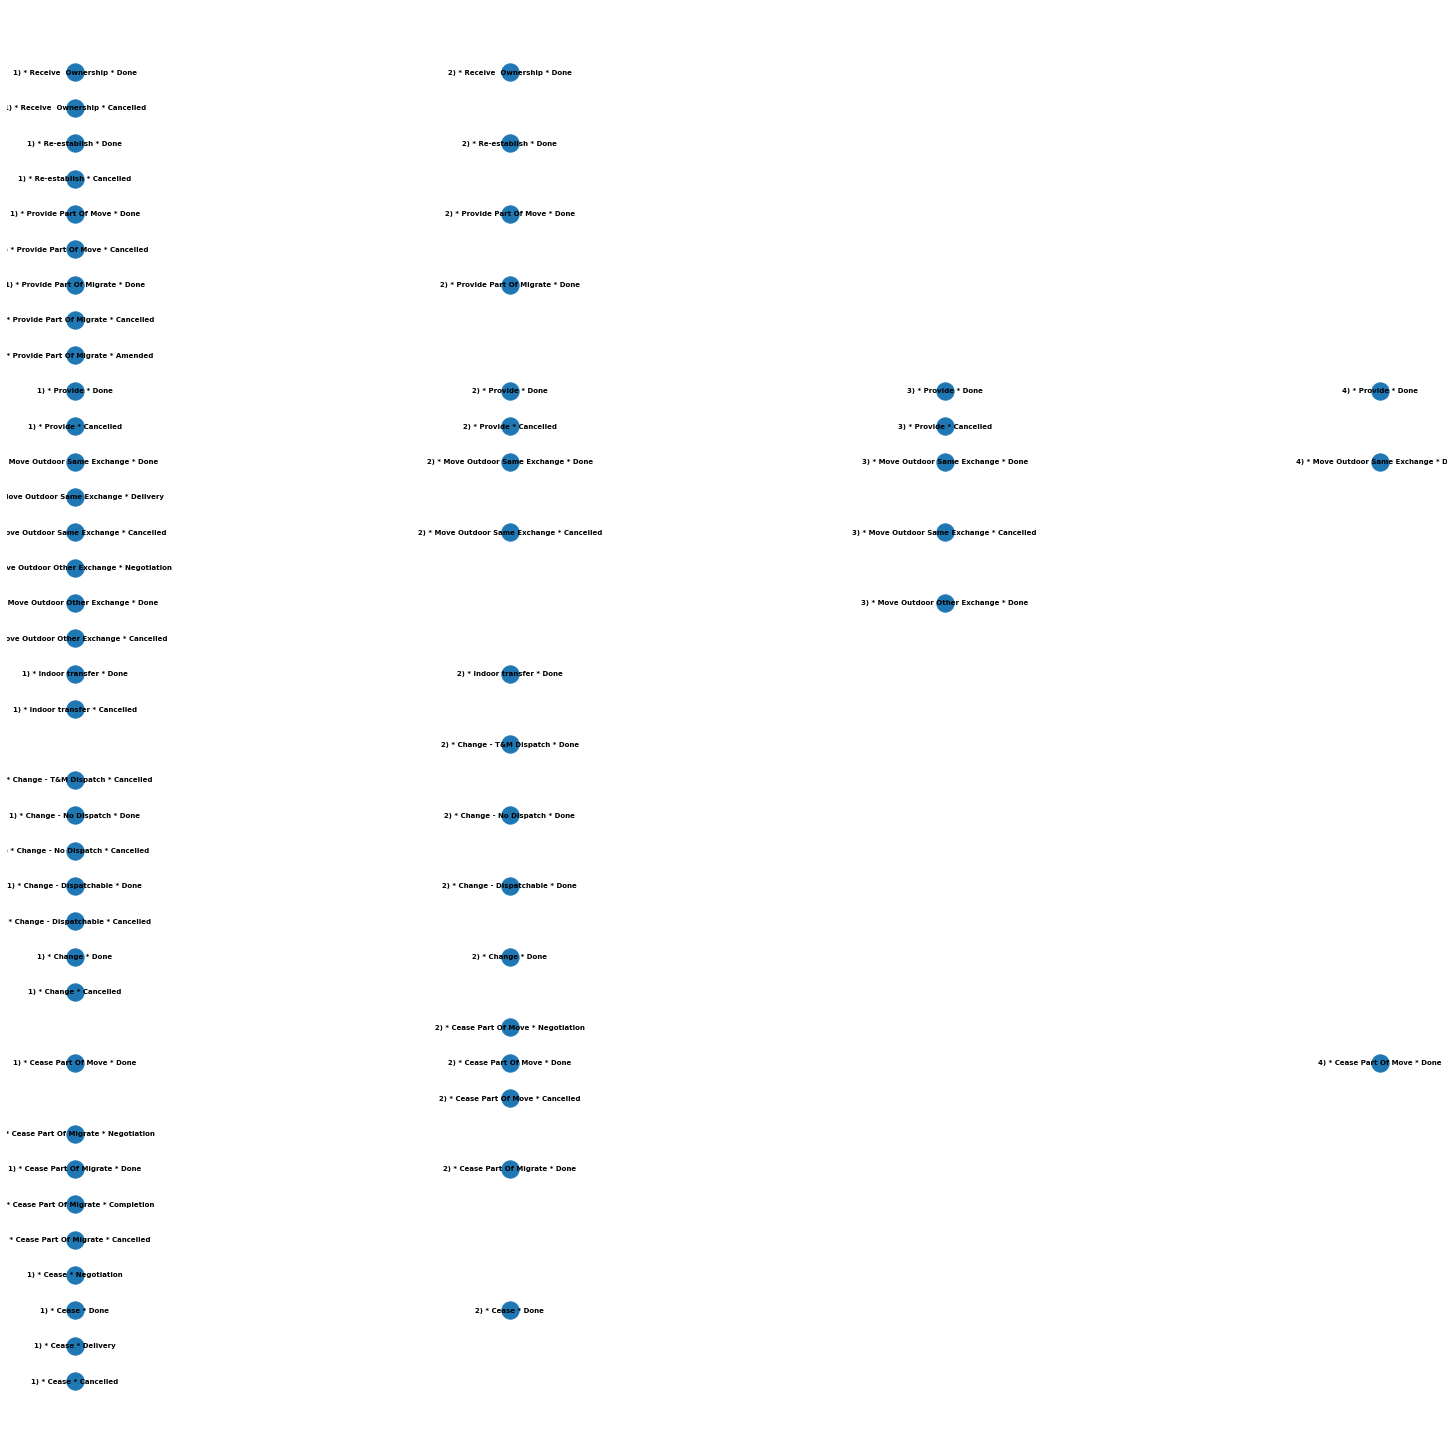

In [91]:
# Draw the resulting graph
pos = nx.get_node_attributes(J,'posi')
nx.draw(J, pos ,with_labels=True, font_weight='bold', font_size = 7)
plt.show()

In [92]:
# clear edges
J.remove_edges_from(list(J.edges()))

In [93]:
#create edges with data (count, days, ave_days)
# accumulated time for nodes

date_col = orders_df.columns.get_loc('ORDER_CREATION_DATE')
kpi = 5

for c in customers:

    temp_df = orders_df[orders_df[unique_col] == c]
  
    for i in range(len(temp_df)-1):
        #print(i, c)
        if J.has_edge(temp_df.iloc[i, -1], temp_df.iloc[(i+1),-1]) == False:
            #print(temp_df.iloc[i, -1], temp_df.iloc[(i+1),-1])
            #print(temp_df.iloc[i,-4], temp_df.iloc[(i+1),-4])
            J.add_edge(temp_df.iloc[i, -1], temp_df.iloc[(i+1),-1])
            J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['count'] = 1
            difference = (temp_df.iloc[(i+1),date_col]-temp_df.iloc[i, date_col])
            J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['days'] = round(difference.total_seconds()/(60*60*24),1)
            J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['ave_days'] = round(J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['days']/ J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['count'],1)
            
            acc_current = J.nodes[temp_df.iloc[(i+1),-1]]['acc_time']
            J.nodes[temp_df.iloc[(i+1),-1]]['acc_time'] = round(acc_current + temp_df.iloc[(i+1),-3]/(60*60*24),1) #-3 is total_time
            #J.nodes[temp_df.iloc[(i+1),-1]]['node_count'] += 1
            
            
            if J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['ave_days'] > kpi:
                J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['color'] = 'red'
            else:
                J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['color'] = 'green'

        else:
            current_count = J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['count']
            J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['count'] = current_count + 1

            current_days =  J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['days']
            difference = (temp_df.iloc[(i+1),date_col]-temp_df.iloc[i, date_col])
            J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['days'] = round(current_days + difference.total_seconds()/(60*60*24),1)

            J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['ave_days'] = round(J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['days']/ J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['count'],1)
            
            acc_current = J.nodes[temp_df.iloc[(i+1),-1]]['acc_time']
            J.nodes[temp_df.iloc[(i+1),-1]]['acc_time'] = round(acc_current + temp_df.iloc[(i+1),-3]/(60*60*24),1) #-3 is total_time         
            #J.nodes[temp_df.iloc[(i+1),-1]]['node_count'] += 1
            
            if J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['ave_days'] > kpi:
                J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['color'] = 'red'
            else:
                J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['color'] = 'green'


In [94]:
for j in J.nodes:
    #print(j)
    #print(J.nodes[j]['acc_time'])
    #print(J.nodes[j]['node_count'])
    J.nodes[j]['ave_journey'] = round(J.nodes[j]['acc_time']/J.nodes[j]['node_count'],1)
    

In [95]:
# add edge weight attribute

all_counts = []

#Iterate through the graph edges to gather all the weights
for (node1,node2,data) in J.edges(data=True):
    all_counts.append(data['count']) 

    
total_count = sum(all_counts)
print('Total Counts',total_count)

if total_count > 0:
    max_count = max(all_counts)
    min_count = min(all_counts)
    ave_count = total_count/len(all_counts)
    scale = 10

    print('Total Counts',total_count)
    print('Max Count',max_count)
    print('Min Count', min_count)
    print('Ave Count',ave_count)


    if (max_count-min_count) == 0:
        for (node1,node2,data) in J.edges(data=True):
            J.edges[node1,node2]['weight'] = round(J.edges[node1,node2]['count'],1)

    else:                                                
        for (node1,node2,data) in J.edges(data=True):
            J.edges[node1,node2]['weight'] = round(((J.edges[node1,node2]['count']-min_count)/(max_count-min_count))*scale+1,1)
    

Total Counts 173
Total Counts 173
Max Count 102
Min Count 1
Ave Count 5.766666666666667


In [96]:
J.edges(data=True)

EdgeDataView([('2) * Change * Done', '1) * Change * Cancelled', {'color': 'red', 'days': 18.0, 'ave_days': 6.0, 'weight': 1.2, 'count': 3}), ('1) * Cease Part Of Migrate * Cancelled', '2) * Cease Part Of Migrate * Done', {'color': 'red', 'days': 771.5, 'ave_days': 7.6, 'weight': 11.0, 'count': 102}), ('1) * Cease Part Of Migrate * Done', '2) * Provide Part Of Migrate * Done', {'color': 'green', 'days': 0.0, 'ave_days': 0.0, 'weight': 1.1, 'count': 2}), ('1) * Cease Part Of Migrate * Done', '2) * Cease Part Of Migrate * Done', {'color': 'green', 'days': 0.0, 'ave_days': 0.0, 'weight': 1.4, 'count': 5}), ('2) * Cease * Done', '1) * Cease * Cancelled', {'color': 'green', 'days': 0.1, 'ave_days': 0.1, 'weight': 1.1, 'count': 2}), ('2) * Provide * Done', '1) * Provide * Cancelled', {'color': 'green', 'days': 17.7, 'ave_days': 1.3, 'weight': 2.3, 'count': 14}), ('2) * Provide Part Of Migrate * Done', '1) * Provide Part Of Migrate * Amended', {'color': 'red', 'days': 11.0, 'ave_days': 11.0, '

In [97]:
J.nodes(data = True)

NodeDataView({'2) * Change * Done': {'posi': (2.95, 13), 'acc_time': 18.0, 'node_count': 3, 'ave_journey': 6.0}, '1) * Cease Part Of Migrate * Cancelled': {'posi': (1.7, 5), 'acc_time': 0, 'node_count': 199, 'ave_journey': 0.0}, '1) * Cease Part Of Migrate * Done': {'posi': (1.7, 7), 'acc_time': 0, 'node_count': 526, 'ave_journey': 0.0}, '2) * Cease Part Of Move * Cancelled': {'posi': (2.95, 9), 'acc_time': 0.0, 'node_count': 2, 'ave_journey': 0.0}, '2) * Provide * Done': {'posi': (2.95, 29), 'acc_time': 17.7, 'node_count': 14, 'ave_journey': 1.3}, '2) * Provide Part Of Migrate * Done': {'posi': (2.95, 32), 'acc_time': 23.1, 'node_count': 10, 'ave_journey': 2.3}, '1) * Provide Part Of Migrate * Cancelled': {'posi': (1.7, 31), 'acc_time': 0, 'node_count': 14, 'ave_journey': 0.0}, '1) * Cease Part Of Move * Done': {'posi': (1.7, 10), 'acc_time': 0, 'node_count': 1, 'ave_journey': 0.0}, '1) * Change - No Dispatch * Cancelled': {'posi': (1.7, 16), 'acc_time': 0, 'node_count': 15, 'ave_jour

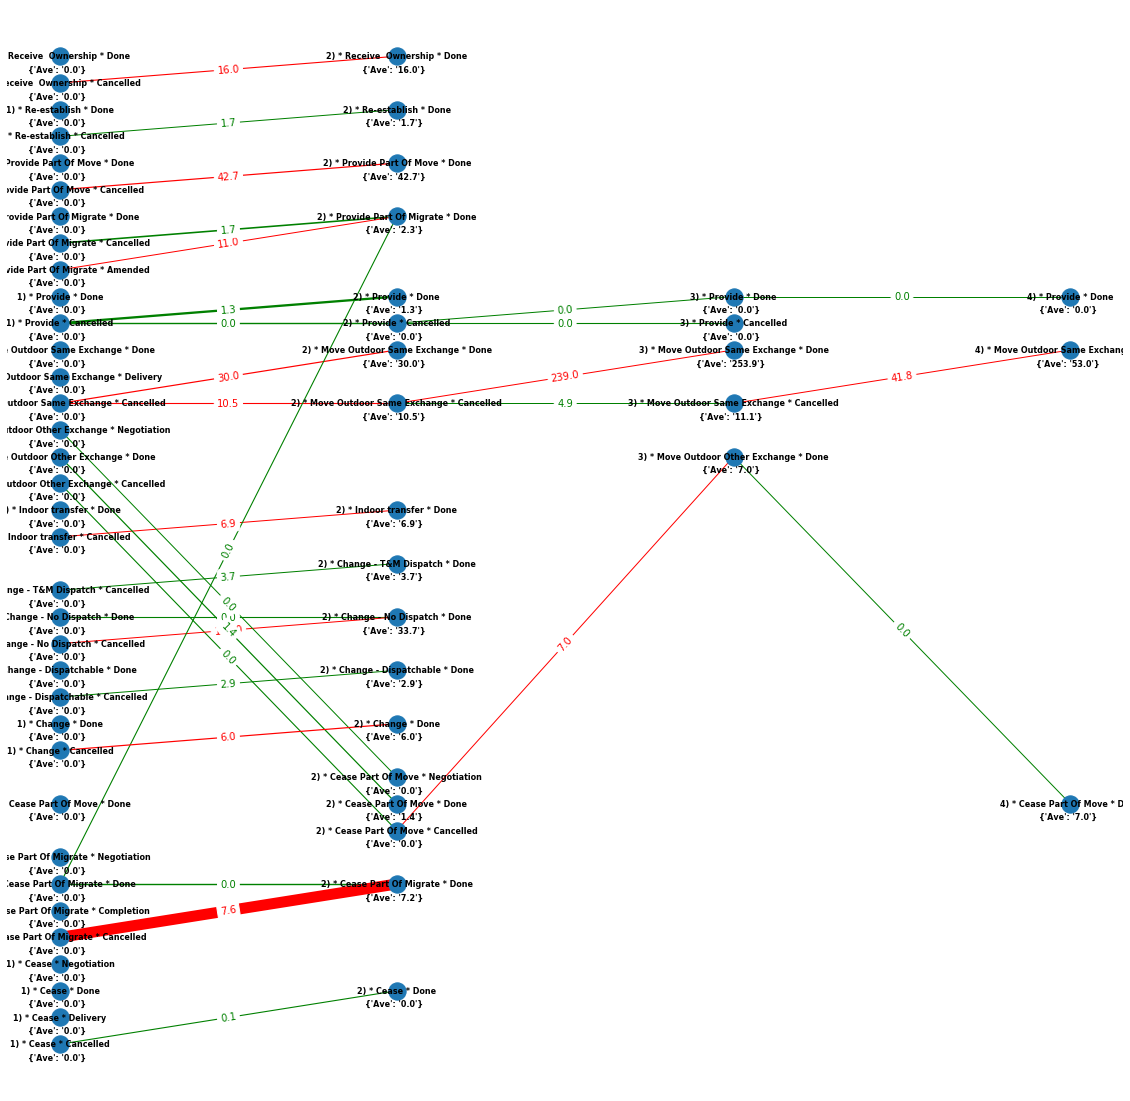

In [98]:
# Draw the resulting graph

#mpl_fig = plt.figure()
mpl_fig, ax = plt.subplots(1,1)

#pos = nx.circular_layout(J)
pos = nx.get_node_attributes(J,'posi')
edges,colors = zip(*nx.get_edge_attributes(J,'color').items())
edges,width = zip(*nx.get_edge_attributes(J,'weight').items())


nx.draw(J,pos, ax=ax, with_labels=True, font_weight='bold', font_size = 8, edgelist=edges, edge_color=colors, width = width
       )

edge_labels  = nx.get_edge_attributes(J,'ave_days')
#label_color  = nx.get_edge_attributes(J,'color').values()

#print(pos)

for e in J.edges(data=True):
    #print(e)
    #print(e[0])
    #print(e[1])
    #print(e[2])
    #print(e[2]['color'])
    nx.draw_networkx_edge_labels(J,ax=ax, pos=pos,edge_labels={(e[0],e[1]):e[2]['ave_days']}, font_color = e[2]['color'])
    

pos_attrs = {}
for node, coords in pos.items():
    pos_attrs[node] = (coords[0] - 0.01, coords[1] - 0.5)

node_attrs = nx.get_node_attributes(J, 'ave_journey')
custom_node_attrs = {}
for node, attr in node_attrs.items():
    custom_node_attrs[node] = "{'Ave': '" + str(attr) + "'}"

nx.draw_networkx_labels(J, pos_attrs, labels=custom_node_attrs, font_weight='bold', font_size = 8)

plt.savefig('stage_transition_edge_colour')
plt.show()